In [1]:
import random
import sys

from sklearn.model_selection import train_test_split

In [2]:
sys.version

'3.9.2 (default, Feb 28 2021, 17:03:44) \n[GCC 10.2.1 20210110]'

In [3]:
random.seed(666)

In [4]:
ds, y = [], []
for i in range(1_000_000):
    # the machine's memory cannot accommodate a larger dataset
    arr = []
    for j in range(1_000):
        arr.append(random.randint(0, 1))
    y.append(random.randint(0, 1))
    ds.append(arr)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(ds, y, test_size=0.5, shuffle=False)

In [6]:
from sklearn.ensemble import GradientBoostingClassifier as gbc
clf = gbc()
clf.fit(X_train, y_train)

GradientBoostingClassifier()

In [7]:
y_pred = clf.predict(X_test)

Confusion matrix:
[[128110 122212]
 [127722 121956]]


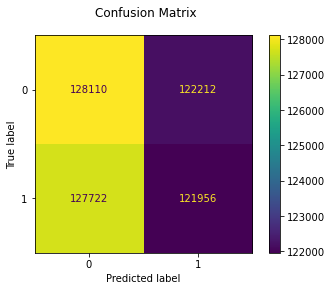

In [8]:
from sklearn import metrics

disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

In [9]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_true=y_test, y_pred=y_pred).ravel()
accuracy = (tn + tp) / (tn + fp + fn + tp)
tpr = tp / (tp + fn)
fpr = fp / (fp + tn)
tnr = tn / (tn + fp)
balanced_accuracy = (tpr + tnr) / 2
print(f'Accuracy: {accuracy*100:.2f}%, Balanced accuracy: {balanced_accuracy*100:.2f}%')

Accuracy: 50.01%, Balanced accuracy: 50.01%
